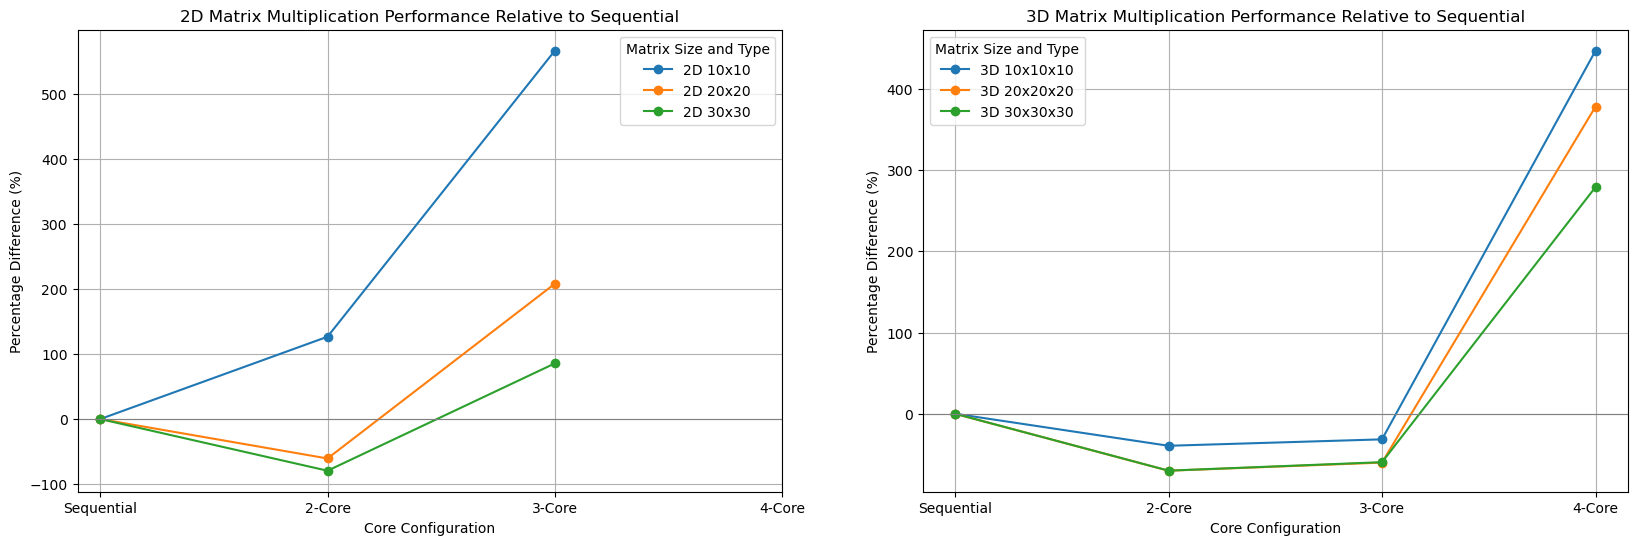

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV, assuming the first row is the header
data_df = pd.read_csv('results.csv')

# Define core configurations
cores = ['Sequential', '2-Core', '3-Core', '4-Core']

# Convert time from nanoseconds to milliseconds
data_df[cores] = data_df[cores] / 1e6

# Define core configurations
cores = ['Sequential', '2-Core', '3-Core', '4-Core']

# Initialize the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Function to calculate percentage difference relative to sequential
def calc_percentage_diff(row, col):
    if col == 'Sequential':
        return 0  # Return 0 for Sequential since it's the baseline
    else:
        return ((row[col] - row['Sequential']) / row['Sequential']) * 100

# Plot data for each dimension
for ax, dtype in zip(axs, ['2D', '3D']):
    for dimension in data_df[data_df['Type'] == dtype]['Dimension'].unique():
        data_current = data_df[(data_df['Type'] == dtype) & (data_df['Dimension'] == dimension)]
        if not data_current.empty:
            # Calculate percentage difference for each core configuration including 'Sequential'
            percentages = [calc_percentage_diff(data_current.iloc[0], col) for col in cores]
            # Plot data
            ax.plot(cores, percentages, marker='o', label=f'{dtype} {dimension}x{dimension}' + ('x' + str(dimension) if dtype == '3D' else ''))

# Configure the subplots
for ax in axs:
    ax.axhline(0, color='gray', linewidth=0.8)  # Add a line at 0% to indicate the baseline
    ax.set_xlabel('Core Configuration')
    ax.set_ylabel('Percentage Difference (%)')
    ax.set_xticks(cores)  # Include 'Sequential' in the x-ticks
    ax.grid(True)
    ax.legend(title="Matrix Size and Type")

axs[0].set_title('2D Matrix Multiplication Performance Relative to Sequential')
axs[1].set_title('3D Matrix Multiplication Performance Relative to Sequential')

plt.show()
